Chapter 20
# 可视化瑞利商
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 0. 球坐标

In [2]:
# 设置步数
intervals = 50
ntheta = intervals
nphi = 2*intervals

# 单位球，球坐标
# theta取值范围为 [0, pi]
theta = np.linspace(0, np.pi*1, ntheta+1)
# phi取值范围为 [0, 2*pi]
phi   = np.linspace(0, np.pi*2, nphi+1)

# 单位球半径
r = 1 

In [3]:
# 球坐标转化为三维直角坐标 
# 第一种方法
# z轴坐标网格数据
Z = np.outer(r*np.cos(theta), np.ones(nphi+1))

# x轴坐标网格数据
X = np.outer(r*np.sin(theta), np.cos(phi))

# y轴坐标网格数据
Y = np.outer(r*np.sin(theta), np.sin(phi))

In [4]:
Z.shape

(51, 101)

In [4]:
# 第二种方法
pp_,tt_ = np.meshgrid(phi,theta)

# z轴坐标网格数据
Z = r*np.cos(tt_)

# x轴坐标网格数据
X = r*np.sin(tt_)*np.cos(pp_)

# y轴坐标网格数据
Y = r*np.sin(tt_)*np.sin(pp_)

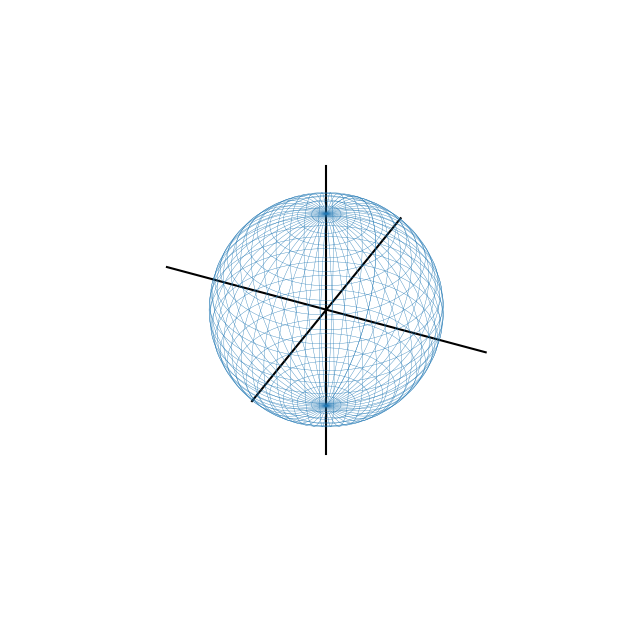

In [5]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2,
               linewidth=0.25)
# 单独绘制经纬线
# surf = ax.plot_wireframe(X, Y, Z, rstride=0, cstride=2,
#                linewidth=0.25)

# surf = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=0,
#                linewidth=0.25)
surf.set_facecolor((0,0,0,0))

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 1.5
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-155, elev=35)
ax.grid(False)
fig.savefig('Figures/单位球.svg', format='svg')

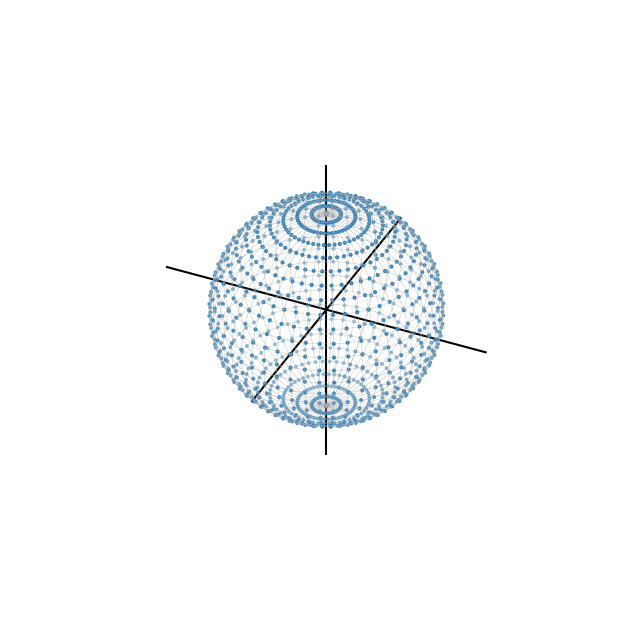

In [17]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2,
                         color = '0.68',linewidth=0.25)

surf.set_facecolor((0,0,0,0))

ax.scatter(X[::2,::2], 
           Y[::2,::2], 
           Z[::2,::2], 
           s = 3.8)
ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 1.5
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-155, elev=35)
ax.grid(False)
fig.savefig('Figures/单位球面上点.svg', format='svg')

### 1. 计算瑞利商
参考：
https://en.wikipedia.org/wiki/Rayleigh_quotient  
https://www.chebfun.org/examples/sphere/RayleighQuotientExample.html

In [7]:
# 每一行代表一个三维直角坐标系坐标点
# 所有坐标点都在单位球面上
Points = np.column_stack([X.ravel(), Y.ravel(), Z.ravel()])

# 定义矩阵Q
Q = np.array([[1, 0.5, 1],
              [0.5, 2, -0.2],
              [1, -0.2, 1]])
# 计算 xT @ Q @ x
Rayleigh_Q = np.diag(Points @ Q @ Points.T)
# 
Rayleigh_Q_ = np.reshape(Rayleigh_Q,X.shape)

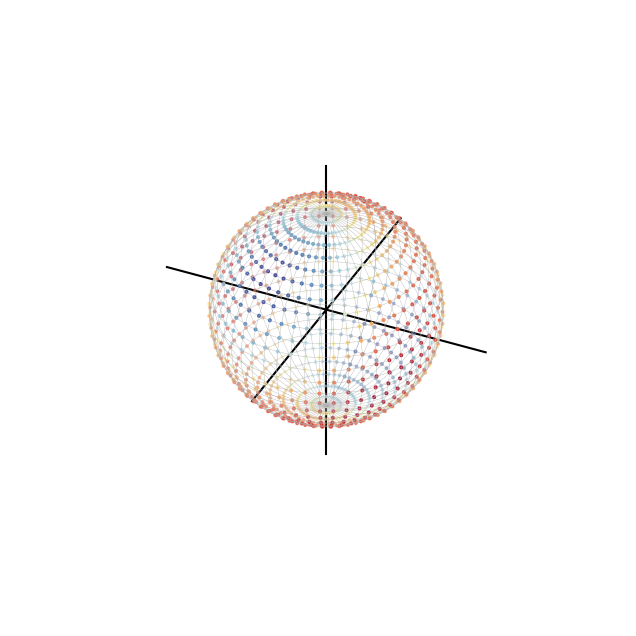

In [16]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_wireframe(X, Y, Z, rstride=2, cstride=2,
                         color = '0.68',linewidth=0.25)

surf.set_facecolor((0,0,0,0))

ax.scatter(X[::2,::2], 
           Y[::2,::2], 
           Z[::2,::2], 
           c = Rayleigh_Q_[::2,::2],
           cmap = 'RdYlBu_r',
           s = 3.8)
ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 1.5
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-155, elev=35)
ax.grid(False)
fig.savefig('Figures/单位球面上点 + 渲染.svg', format='svg')

### 2. 填充

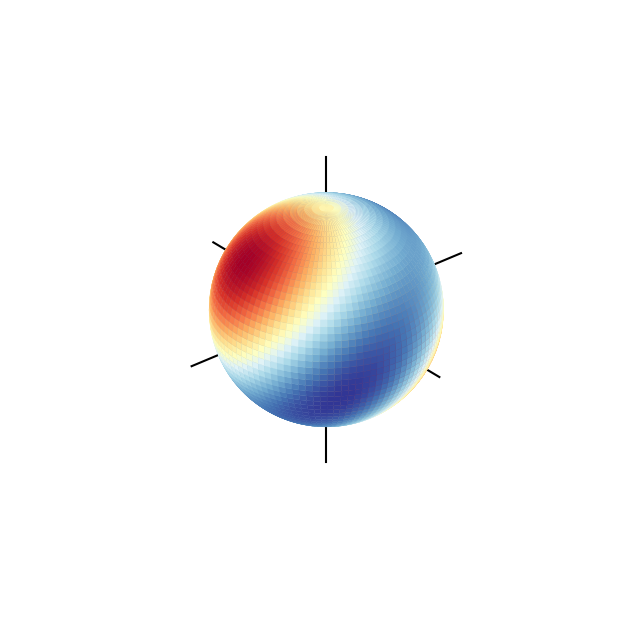

In [6]:
norm_plt = plt.Normalize(Rayleigh_Q_.min(), Rayleigh_Q_.max())
colors = cm.RdYlBu_r(norm_plt(Rayleigh_Q_))

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
               linewidth=0.25, shade=False)

# surf.set_facecolor((0,0,0,0))

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
k = 1.5
# three reference lines
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-130, elev=30)
ax.grid(False)
fig.savefig('Figures/瑞利商，填充.svg', format='svg')

### 3. 只有网格

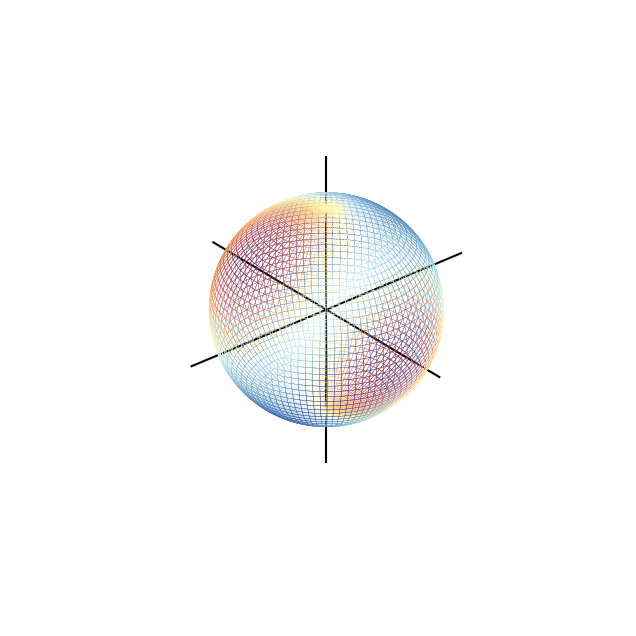

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, facecolors=colors,
               linewidth=0.25, shade=False)

surf.set_facecolor((0,0,0,0))

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式

ax.set_xlabel('$\it{x_1}$')
ax.set_ylabel('$\it{x_2}$')
ax.set_zlabel('$\it{x_3}$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.plot((-k, k), (0, 0), (0, 0), 'k')
ax.plot((0, 0), (-k, k), (0, 0), 'k')
ax.plot((0, 0), (0, 0), (-k, k), 'k')
ax.axis('off')
k = 1.5
ax.set_xlim((-k, k))
ax.set_ylim((-k, k))
ax.set_zlim((-k, k))
ax.set_box_aspect([1,1,1])
ax.view_init(azim=-130, elev=30)
ax.grid(False)
# fig.savefig('Figures/瑞利商，网格.svg', format='svg')

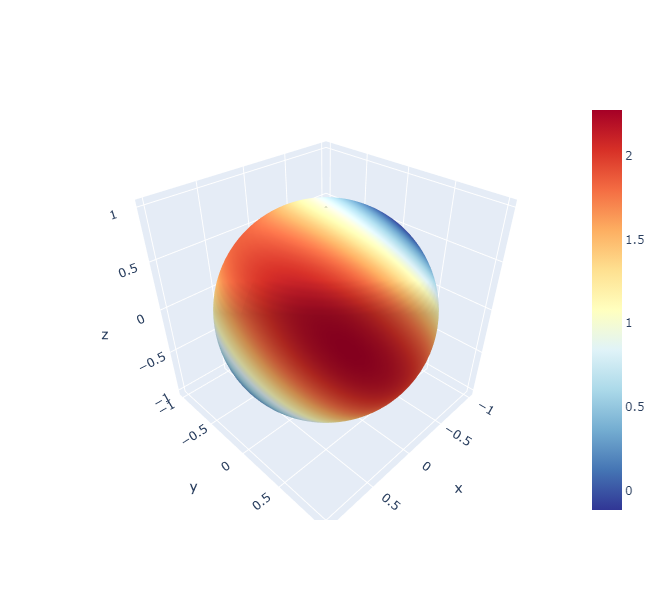

In [78]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=X, y=Y, z=Z, 
                                 surfacecolor=Rayleigh_Q_, 
                                 colorscale='RdYlBu_r')])

fig.update_layout(width=600, height=600)
fig.show()

## 将瑞利商球面展开
相当于圆柱形地图投影法

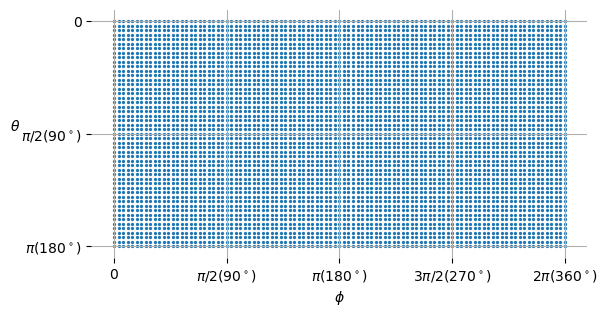

In [66]:
fig, ax = plt.subplots()
c = ax.scatter(pp_,
               tt_, 
               s = 1.8)
ax.set_ylim(tt_.min(), tt_.max())
ax.set_xlim(pp_.min(), pp_.max())
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.set_xticks(np.linspace(0, 2*np.pi, 5))
ax.set_xticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$',
                    r'$3\pi/2 (270^\circ)$', 
                    r'$2\pi (360^\circ)$'])

ax.set_yticks(np.linspace(0, np.pi, 3))
ax.set_yticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$'])
ax.invert_yaxis()
plt.axis('scaled')
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# fig.savefig('Figures/角度网格散点.svg', format='svg')

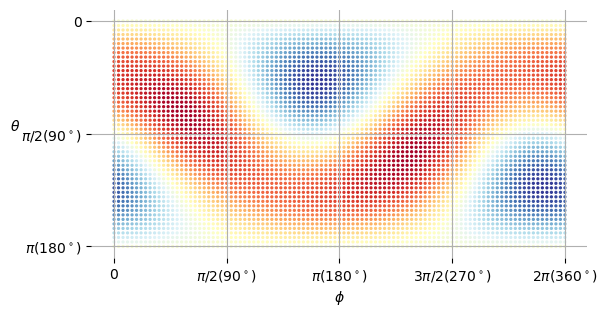

In [65]:
fig, ax = plt.subplots()
c = ax.scatter(pp_,
               tt_, 
               c = Rayleigh_Q_, 
               cmap='RdYlBu_r', s = 1.8)

ax.set_ylim(tt_.min(), tt_.max())
ax.set_xlim(pp_.min(), pp_.max())
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.set_xticks(np.linspace(0, 2*np.pi, 5))
ax.set_xticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$',
                    r'$3\pi/2 (270^\circ)$', 
                    r'$2\pi (360^\circ)$'])

ax.set_yticks(np.linspace(0, np.pi, 3))
ax.set_yticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$'])
ax.invert_yaxis()
plt.axis('scaled')
plt.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
# fig.savefig('Figures/角度网格散点 + 渲染.svg', format='svg')

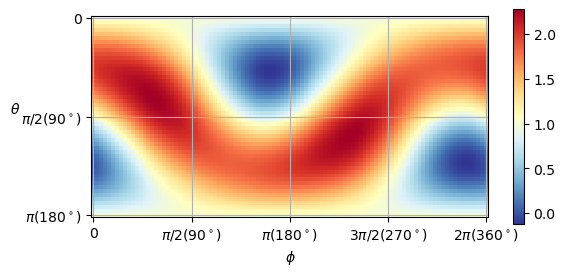

In [67]:
fig, ax = plt.subplots()
c = ax.pcolormesh(pp_,
                  tt_, 
                  Rayleigh_Q_, 
                  cmap='RdYlBu_r', shading='auto',
                  vmin=Rayleigh_Q_.min(), vmax=Rayleigh_Q_.max())
fig.colorbar(c, ax=ax, shrink = 0.58)


ax.set_xlim(tt_.min(), tt_.max())
ax.set_ylim(pp_.min(), pp_.max())
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.set_xticks(np.linspace(0, 2*np.pi, 5))
ax.set_xticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$',
                    r'$3\pi/2 (270^\circ)$', 
                    r'$2\pi (360^\circ)$'])

ax.set_yticks(np.linspace(0, np.pi, 3))
ax.set_yticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$'])
ax.invert_yaxis()
plt.axis('scaled')
plt.grid()
plt.show()

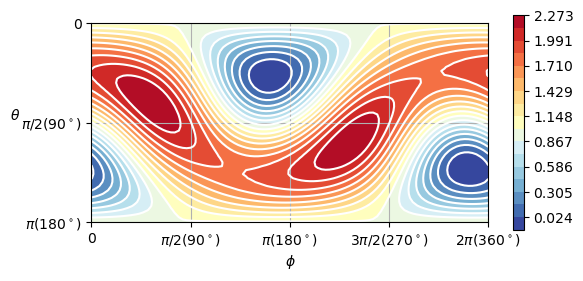

In [64]:
fig, ax = plt.subplots()
levels = np.linspace(Rayleigh_Q_.min(),Rayleigh_Q_.max(),18)

colorbar = ax.contourf(pp_,
                       tt_, 
                       Rayleigh_Q_, levels = levels, cmap='RdYlBu_r')
ax.contour(pp_,tt_, Rayleigh_Q_, levels = levels, colors = 'w')

fig.colorbar(colorbar, ax=ax, shrink = 0.58)
ax.set_ylim(tt_.min(), tt_.max())
ax.set_xlim(pp_.min(), pp_.max())
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.set_xticks(np.linspace(0, 2*np.pi, 5))
ax.set_xticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$',
                    r'$3\pi/2 (270^\circ)$', 
                    r'$2\pi (360^\circ)$'])

ax.set_yticks(np.linspace(0, np.pi, 3))
ax.set_yticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$'])
ax.invert_yaxis()
plt.axis('scaled')
plt.grid()
plt.show()

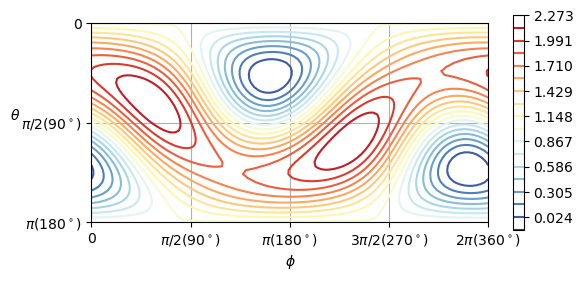

In [63]:
fig, ax = plt.subplots()

colorbar = ax.contour(pp_,tt_, Rayleigh_Q_, levels = levels, cmap='RdYlBu_r')

fig.colorbar(colorbar, ax=ax, shrink = 0.58)
ax.set_ylim(tt_.min(), tt_.max())
ax.set_xlim(pp_.min(), pp_.max())
# ax.set_xticks([])
# ax.set_yticks([])
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$', rotation=0)
ax.set_xticks(np.linspace(0, 2*np.pi, 5))
ax.set_xticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$',
                    r'$3\pi/2 (270^\circ)$', 
                    r'$2\pi (360^\circ)$'])

ax.set_yticks(np.linspace(0, np.pi, 3))
ax.set_yticklabels(['0',
                    r'$\pi/2 (90^\circ)$',
                    r'$\pi (180^\circ)$'])
ax.invert_yaxis()
plt.axis('scaled')
plt.grid()
plt.show()

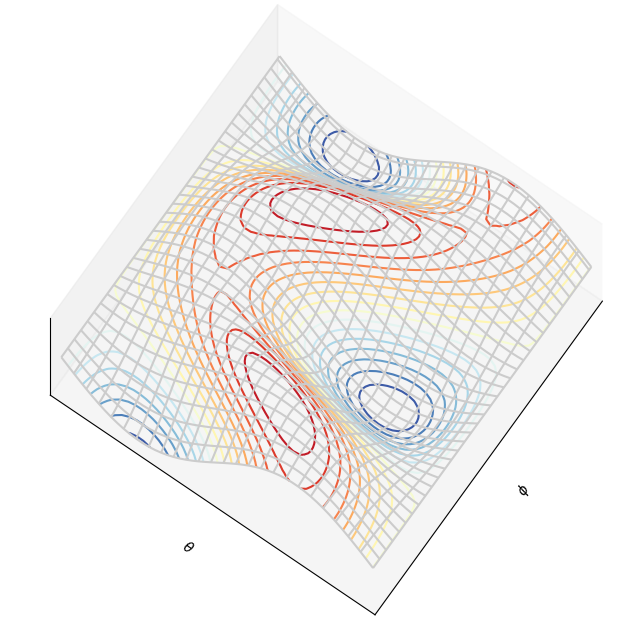

In [77]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_wireframe(pp_,tt_, Rayleigh_Q_,
                  colors = '0.8')
ax.contour(pp_,tt_, Rayleigh_Q_, levels = levels, cmap='RdYlBu_r')

ax.set_proj_type('ortho')
# 另外一种设定正交投影的方式
ax.set_ylim(tt_.min(), tt_.max())
ax.set_xlim(pp_.min(), pp_.max())
ax.set_xlabel(r'$\phi$')
ax.set_ylabel(r'$\theta$')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
# ax.set_box_aspect([1,1,1])
ax.view_init(azim=-145, elev=75)
ax.grid(False)
# fig.savefig('Figures/瑞利商，网格.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023